This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [181]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [182]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [183]:
train_labels[0]

1

In [184]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [185]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [186]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [187]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [188]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [189]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [190]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [191]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [192]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6659 - loss: 0.6054 - val_accuracy: 0.8649 - val_loss: 0.4024
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8978 - loss: 0.3405 - val_accuracy: 0.8732 - val_loss: 0.3305
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9178 - loss: 0.2571 - val_accuracy: 0.8929 - val_loss: 0.2852
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9394 - loss: 0.1974 - val_accuracy: 0.8870 - val_loss: 0.2848
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9523 - loss: 0.1596 - val_accuracy: 0.8893 - val_loss: 0.2762
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9612 - loss: 0.1329 - val_accuracy: 0.8860 - val_loss: 0.2905
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9683 - loss: 0.1161 - val_accuracy: 0.8802 - val_loss: 0.3024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9748 - loss: 0.0957 - val_accuracy: 0.8845 - v

In [193]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

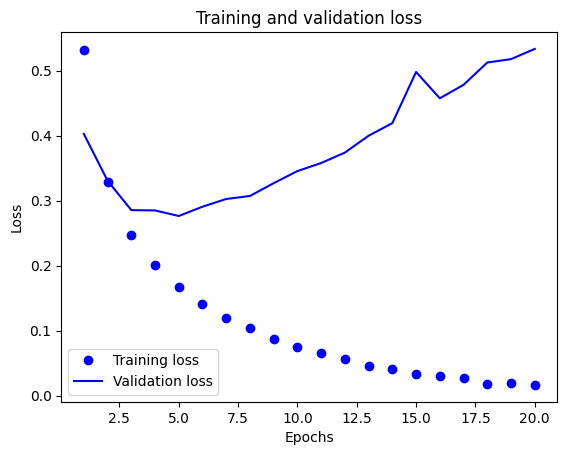

In [194]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

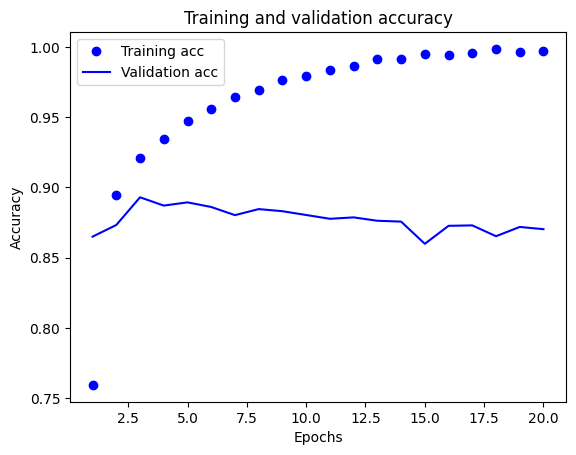

In [195]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [196]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7123 - loss: 0.5771
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9005 - loss: 0.3046
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9274 - loss: 0.2199
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9321 - loss: 0.1894
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8850 - loss: 0.2848


In [179]:
results_test

[0.2889654040336609, 0.8852800130844116]

In [178]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7204 - loss: 1.1546
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8782 - loss: 0.5987
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8815 - loss: 0.5019
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8948 - loss: 0.4274
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8751 - loss: 0.4355


In [180]:
results_val

[0.4309844970703125, 0.8774399757385254]

### Using a trained model to generate predictions on new data

In [197]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1914265 ],
       [0.99851084],
       [0.7675323 ],
       ...,
       [0.09908374],
       [0.0811417 ],
       [0.51199454]], dtype=float32)

**Model 2**

In [198]:
# model2 with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**


In [199]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating**

**Setting aside a validation set**

In [200]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training Model**

In [201]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6669 - loss: 0.6099 - val_accuracy: 0.8690 - val_loss: 0.3829
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9045 - loss: 0.3189 - val_accuracy: 0.8809 - val_loss: 0.3068
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9213 - loss: 0.2278 - val_accuracy: 0.8683 - val_loss: 0.3195
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9400 - loss: 0.1772 - val_accuracy: 0.8746 - val_loss: 0.3136
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9564 - loss: 0.1393 - val_accuracy: 0.8839 - val_loss: 0.2909
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9678 - loss: 0.1121 - val_accuracy: 0.8545 - val_loss: 0.4023
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9696 - loss: 0.0999 - val_accuracy: 0.8792 - val_loss: 0.3194
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9824 - loss: 0.0691 - val_accuracy: 0.8805 - v

**Model 2**

In [202]:
#model2 with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [203]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Setting aside a validation set**

In [204]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [205]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6822 - loss: 0.6169 - val_accuracy: 0.8496 - val_loss: 0.4416
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8796 - loss: 0.3860 - val_accuracy: 0.8785 - val_loss: 0.3407
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9090 - loss: 0.2841 - val_accuracy: 0.8875 - val_loss: 0.2981
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9275 - loss: 0.2252 - val_accuracy: 0.8705 - val_loss: 0.3135
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9370 - loss: 0.1901 - val_accuracy: 0.8733 - val_loss: 0.3100
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9447 - loss: 0.1649 - val_accuracy: 0.8870 - val_loss: 0.2804
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9616 - loss: 0.1333 - val_accuracy: 0.8827 - val_loss: 0.2976
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9661 - loss: 0.1177 - val_accuracy: 0.8852 - v

In [206]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

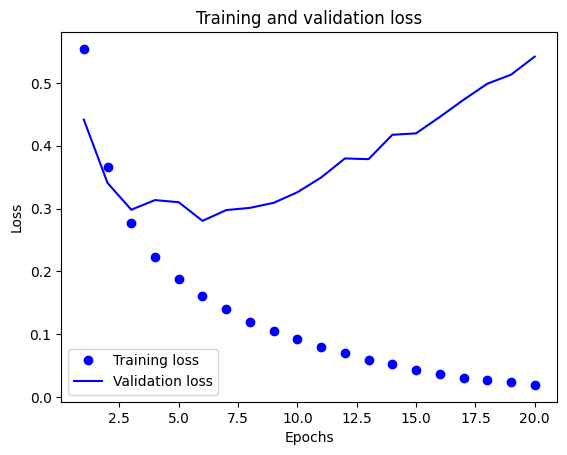

In [207]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

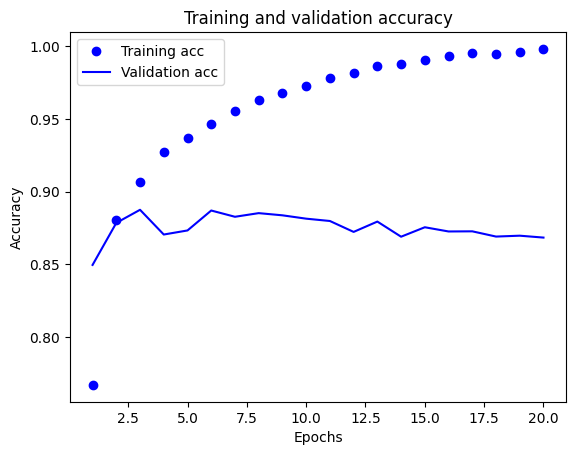

In [208]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [209]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7373 - loss: 0.5656
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8973 - loss: 0.3237
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9145 - loss: 0.2559
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9258 - loss: 0.2197
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8842 - loss: 0.2852


In [210]:
results_test

[0.28614529967308044, 0.8846399784088135]

In [211]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9368 - loss: 0.1905
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9433 - loss: 0.1725
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9479 - loss: 0.1583
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9491 - loss: 0.1504
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8764 - loss: 0.3072


In [212]:
results_val

[0.302819162607193, 0.8798400163650513]

**Using a trained model to generate predictions on new data**

In [213]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.24158992],
       [0.9997136 ],
       [0.84344923],
       ...,
       [0.11291283],
       [0.08470977],
       [0.6601336 ]], dtype=float32)

**Model 3**

In [214]:
# build the model with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [215]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating approach**

**Setting aside a validation set**

In [216]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [217]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6951 - loss: 0.5934 - val_accuracy: 0.8567 - val_loss: 0.4128
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8881 - loss: 0.3607 - val_accuracy: 0.8811 - val_loss: 0.3345
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9174 - loss: 0.2774 - val_accuracy: 0.8813 - val_loss: 0.3079
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9254 - loss: 0.2340 - val_accuracy: 0.8914 - val_loss: 0.2849
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9379 - loss: 0.1995 - val_accuracy: 0.8875 - val_loss: 0.2837
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9432 - loss: 0.1760 - val_accuracy: 0.8831 - val_loss: 0.2920
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9519 - loss: 0.1587 - val_accuracy: 0.8886 - val_loss: 0.2763
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9575 - loss: 0.1474 - val_accuracy: 0.8863 - v

In [218]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

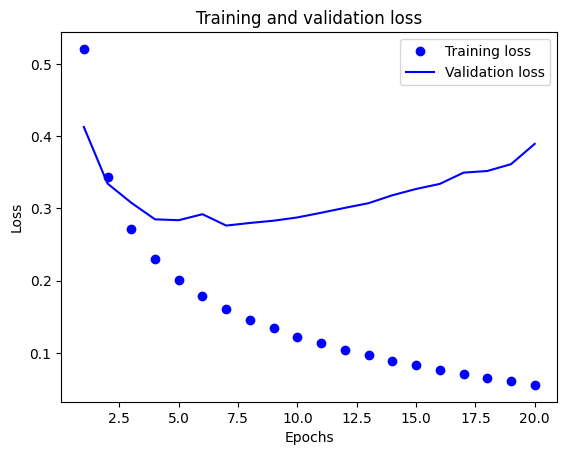

In [219]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

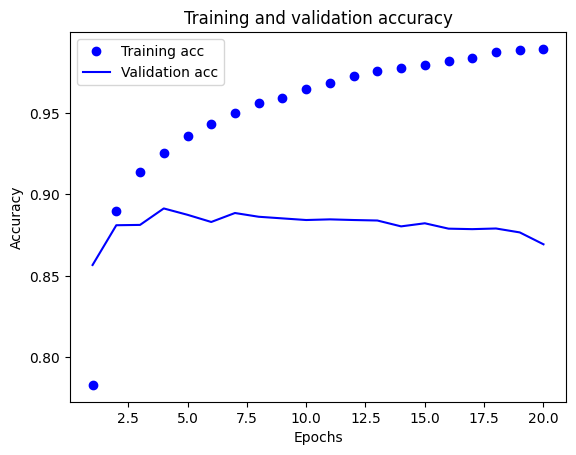

In [220]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [221]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6708 - loss: 0.6048
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8963 - loss: 0.3294
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9264 - loss: 0.2237
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9378 - loss: 0.1800
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8780 - loss: 0.3117


In [222]:
results_test

[0.31133168935775757, 0.8793200254440308]

In [223]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9482 - loss: 0.1556
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9514 - loss: 0.1406
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9629 - loss: 0.1118
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9667 - loss: 0.1020
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8678 - loss: 0.3888


In [224]:
results_val

[0.3852177858352661, 0.8696399927139282]

In [225]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.06419826],
       [0.99869645],
       [0.6238973 ],
       ...,
       [0.12326458],
       [0.0178102 ],
       [0.7137722 ]], dtype=float32)

Model 4

In [226]:
# model2 with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),


    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [227]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [228]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [229]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6891 - loss: 0.5859 - val_accuracy: 0.8754 - val_loss: 0.3573
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8906 - loss: 0.3168 - val_accuracy: 0.8884 - val_loss: 0.2909
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9218 - loss: 0.2312 - val_accuracy: 0.8916 - val_loss: 0.2753
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9353 - loss: 0.1898 - val_accuracy: 0.8877 - val_loss: 0.2737
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9510 - loss: 0.1504 - val_accuracy: 0.8852 - val_loss: 0.2816
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9633 - loss: 0.1198 - val_accuracy: 0.8823 - val_loss: 0.2969
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.8595 - val_loss: 0.3941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9676 - loss: 0.0947 - val_accuracy: 0.8820 - v

Plotting the training and validation loss

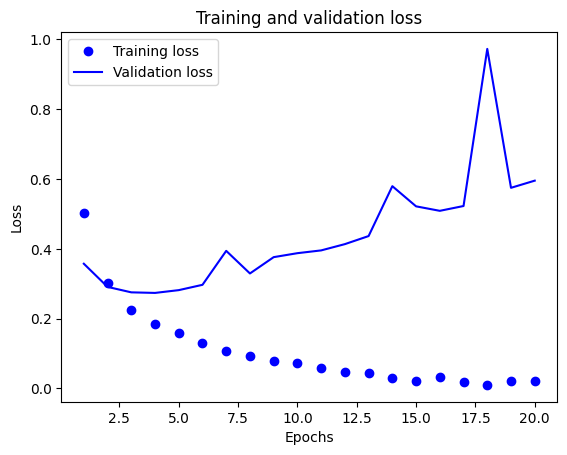

In [230]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

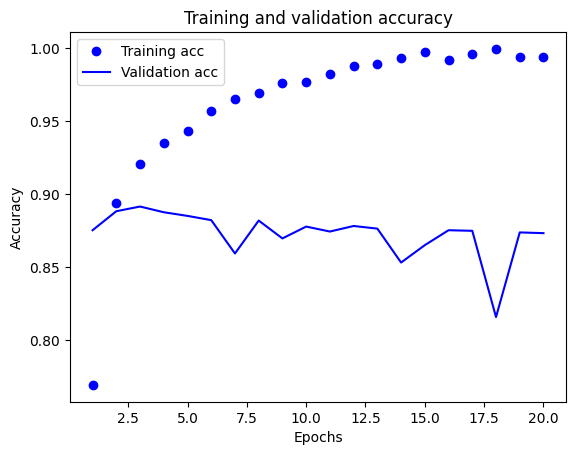

In [231]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [232]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7365 - loss: 0.5487
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9025 - loss: 0.2725
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9279 - loss: 0.2057
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9371 - loss: 0.1721
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8811 - loss: 0.2951


In [233]:
results_test

[0.2945205569267273, 0.8822399973869324]

In [234]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9334 - loss: 0.1729
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9554 - loss: 0.1312
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9568 - loss: 0.1207
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9621 - loss: 0.1041
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8680 - loss: 0.3747


In [235]:
results_val

[0.370725154876709, 0.8707200288772583]

Model 5

In [236]:
# model2 with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),



    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [237]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set



In [238]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [239]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6935 - loss: 0.5787 - val_accuracy: 0.8533 - val_loss: 0.3891
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8919 - loss: 0.3320 - val_accuracy: 0.8853 - val_loss: 0.3125
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9153 - loss: 0.2562 - val_accuracy: 0.8894 - val_loss: 0.2871
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9342 - loss: 0.2057 - val_accuracy: 0.8869 - val_loss: 0.2804
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9407 - loss: 0.1840 - val_accuracy: 0.8869 - val_loss: 0.2835
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9489 - loss: 0.1600 - val_accuracy: 0.8867 - val_loss: 0.2764
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9564 - loss: 0.1439 - val_accuracy: 0.8864 - val_loss: 0.2917
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9620 - loss: 0.1266 - val_accuracy: 0.8867 - v

Plotting the training and validation loss

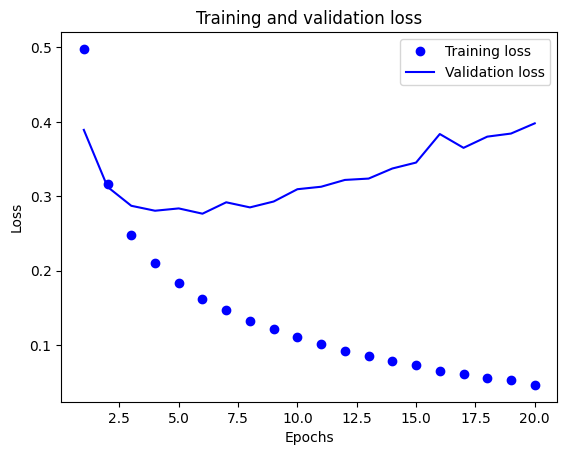

In [240]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

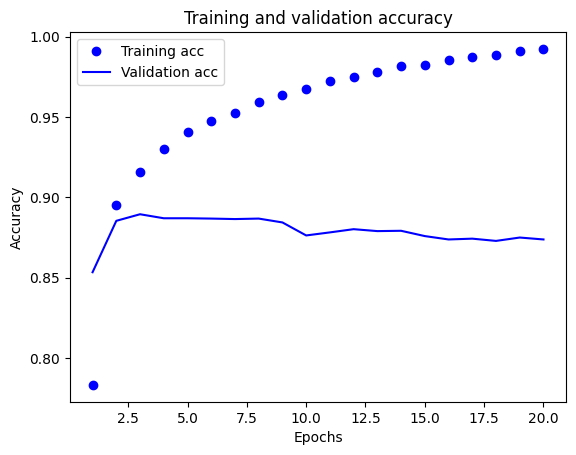

In [241]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [171]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7227 - loss: 0.5540
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8999 - loss: 0.2775
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9259 - loss: 0.2087
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9415 - loss: 0.1690
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8830 - loss: 0.2911


In [242]:
results_test

[0.2945205569267273, 0.8822399973869324]

In [243]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9449 - loss: 0.1849
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9556 - loss: 0.1416
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9629 - loss: 0.1169
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9668 - loss: 0.1041
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.4143


In [244]:
results_val

[0.4112447202205658, 0.8608800172805786]

Model 6

In [245]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])


compiling the model

In [246]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

Setting aside a validation set

In [247]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [248]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6819 - loss: 0.8647 - val_accuracy: 0.8572 - val_loss: 0.4256
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8600 - loss: 0.3923 - val_accuracy: 0.8373 - val_loss: 0.3342
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8707 - loss: 0.3069 - val_accuracy: 0.8568 - val_loss: 0.2734
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8802 - loss: 0.2522 - val_accuracy: 0.8666 - val_loss: 0.2286
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8748 - loss: 0.2183 - val_accuracy: 0.7916 - val_loss: 0.2346
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8685 - loss: 0.1920 - val_accuracy: 0.8340 - val_loss: 0.1932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8775 - loss: 0.1704 - val_accuracy: 0.8732 - val_loss: 0.1616
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8793 - loss: 0.1552 - val_accuracy: 0.8629 - 

Plotting the training and validation loss

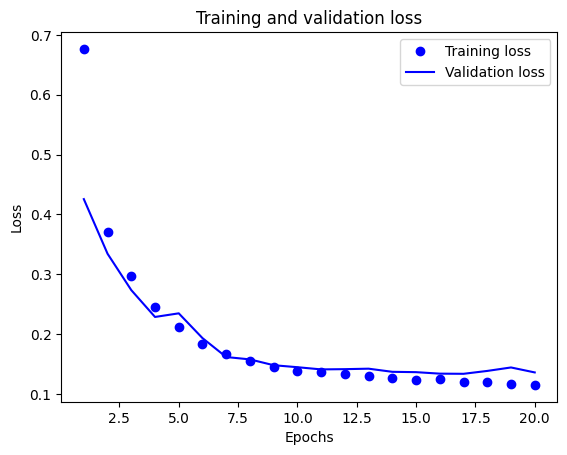

In [249]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

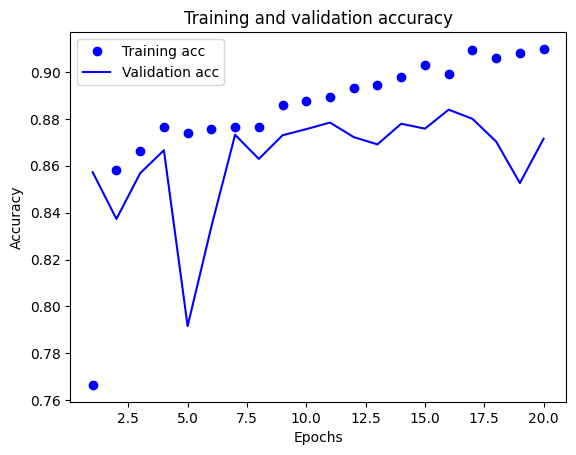

In [250]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [251]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7472 - loss: 1.1504
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8802 - loss: 0.5987
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8894 - loss: 0.4860
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8886 - loss: 0.4318
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8815 - loss: 0.4235


In [252]:
results_test

[0.42044106125831604, 0.8821200132369995]

In [253]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8856 - loss: 0.4201
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8975 - loss: 0.3657
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9081 - loss: 0.3380
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9108 - loss: 0.3265
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8813 - loss: 0.3756


In [254]:
results_val

[0.3736857771873474, 0.8839600086212158]

Model 7

In [255]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(126, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [256]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [257]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [258]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.5718 - loss: 2.0112 - val_accuracy: 0.8237 - val_loss: 0.5970
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.7122 - loss: 0.5495 - val_accuracy: 0.8413 - val_loss: 0.3986
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7519 - loss: 0.4038 - val_accuracy: 0.8318 - val_loss: 0.3275
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7713 - loss: 0.3418 - val_accuracy: 0.8487 - val_loss: 0.2777
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7841 - loss: 0.2999 - val_accuracy: 0.8133 - val_loss: 0.2586
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7901 - loss: 0.2702 - val_accuracy: 0.8605 - val_loss: 0.2247
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8090 - loss: 0.2487 - val_accuracy: 0.8615 - val_loss: 0.2105
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8056 - loss: 0.2381 - val_accuracy: 0.

Plotting the training and validation loss

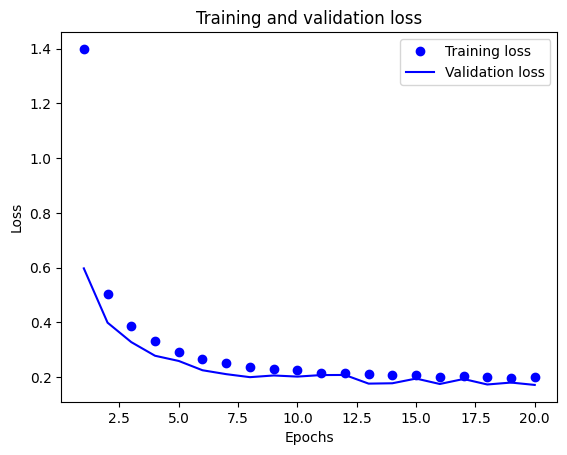

In [259]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

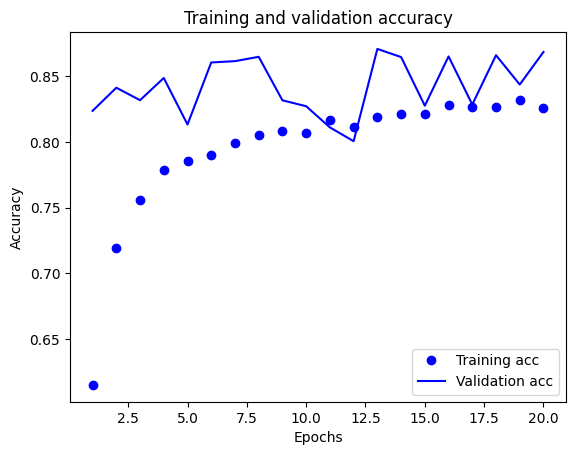

In [260]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [261]:
model = keras.Sequential([
    layers.Dense(126, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.5463 - loss: 1.6771
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.6983 - loss: 0.4215
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7456 - loss: 0.3196
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7720 - loss: 0.2662
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8133 - loss: 0.2313


In [262]:
results_test

[0.22963492572307587, 0.8169599771499634]

In [263]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.7573 - loss: 0.2526
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7878 - loss: 0.2290
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7920 - loss: 0.2216
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8101 - loss: 0.2125
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8507 - loss: 0.1864


In [264]:
results_val

[0.18642626702785492, 0.8517600297927856]

Model 8

In [265]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [266]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [267]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [268]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7012 - loss: 0.1978 - val_accuracy: 0.8406 - val_loss: 0.1309
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8765 - loss: 0.1122 - val_accuracy: 0.8794 - val_loss: 0.0999
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9045 - loss: 0.0857 - val_accuracy: 0.8840 - val_loss: 0.0909
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9226 - loss: 0.0709 - val_accuracy: 0.8868 - val_loss: 0.0856
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9293 - loss: 0.0635 - val_accuracy: 0.8749 - val_loss: 0.0919
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9389 - loss: 0.0568 - val_accuracy: 0.8865 - val_loss: 0.0837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9420 - loss: 0.0516 - val_accuracy: 0.8848 - val_loss: 0.0825
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9494 - loss: 0.0456 - val_accuracy: 0.8734 - v

In [269]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

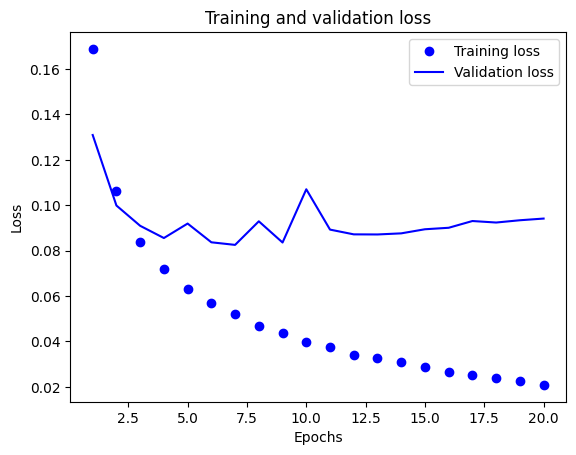

In [270]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

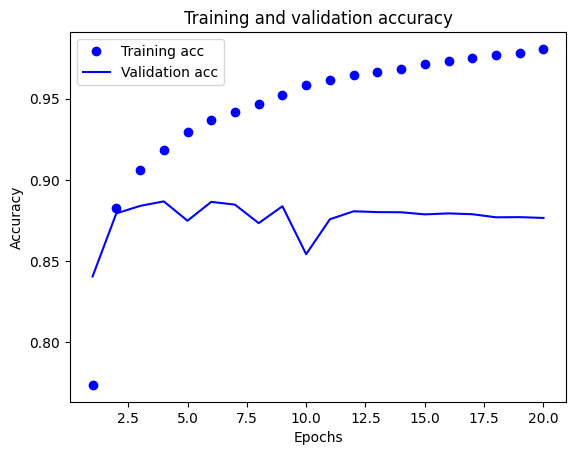

In [271]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [272]:
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7208 - loss: 0.3512
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8630 - loss: 0.1588
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8697 - loss: 0.1497
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8771 - loss: 0.1444
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8426 - loss: 0.1554


In [273]:
results_test

[0.15385255217552185, 0.8468400239944458]

In [274]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8719 - loss: 0.1440
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8728 - loss: 0.1400
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8730 - loss: 0.1391
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8756 - loss: 0.1378
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8587 - loss: 0.1462


In [275]:
results_val

[0.1460731476545334, 0.8588799834251404]

In [276]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.37469065],
       [0.9418483 ],
       [0.51682514],
       ...,
       [0.2202851 ],
       [0.20810063],
       [0.40521508]], dtype=float32)

**Model 9**

In [277]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [278]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [279]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [280]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6932 - loss: 0.2098 - val_accuracy: 0.8603 - val_loss: 0.1316
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8837 - loss: 0.1114 - val_accuracy: 0.8637 - val_loss: 0.1083
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9052 - loss: 0.0834 - val_accuracy: 0.8876 - val_loss: 0.0899
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9251 - loss: 0.0673 - val_accuracy: 0.8782 - val_loss: 0.0907
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9391 - loss: 0.0555 - val_accuracy: 0.8860 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9515 - loss: 0.0469 - val_accuracy: 0.8858 - val_loss: 0.0835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9606 - loss: 0.0392 - val_accuracy: 0.8715 - val_loss: 0.0928
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9665 - loss: 0.0355 - val_accuracy: 0.8790 - v

In [281]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

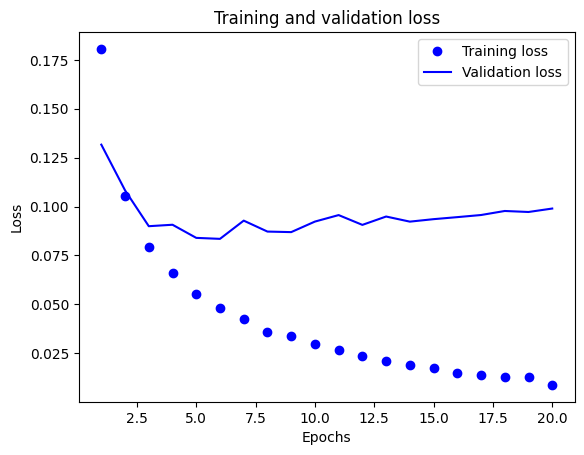

In [282]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

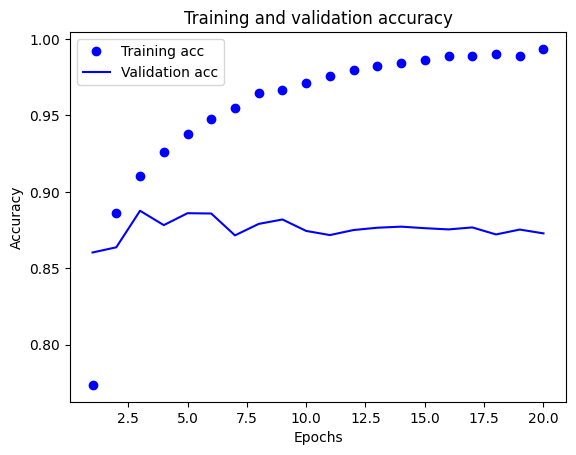

In [283]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [284]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6786 - loss: 0.2072
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8502 - loss: 0.1251
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8865 - loss: 0.0991
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8942 - loss: 0.0894
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8862 - loss: 0.0882


In [285]:
results_test

[0.08743192255496979, 0.8875600099563599]

In [286]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9094 - loss: 0.0778
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9174 - loss: 0.0723
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9261 - loss: 0.0649
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9336 - loss: 0.0597
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8856 - loss: 0.0835


In [287]:
results_val

[0.08272325992584229, 0.8871600031852722]

In [288]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19071074],
       [0.99976516],
       [0.83180064],
       ...,
       [0.13424446],
       [0.09865884],
       [0.55821115]], dtype=float32)